In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


from IPython.display import display

from sklearn import ensemble, svm, neighbors, linear_model
from xgboost import XGBClassifier


from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, ensemble, svm, neighbors, linear_model
from sklearn.metrics import roc_curve, auc


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold


from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler


from mlxtend.plotting import plot_decision_regions
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [33]:
# Load your data (replace 'your_data.csv' with your actual data file)
df = pd.read_csv('/home/student24/Coop_Projects/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 2. Explore Data
df.head()  
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [38]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,is_partner,is_dependents,has_online_security,has_device_protection,num_services
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785,0.482509,0.298493,0.286547,0.343857,5.540813
std,0.368844,24.545260,30.085974,2266.771362,0.441782,0.499729,0.457629,0.452180,0.475028,1.893415
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


The statistical summary reveals that approximately 16.24% of customers are seniors, indicating a potential market for tailored services. With an average tenure of 32.42 months and a churn rate of 26.58%, there are significant concerns regarding customer retention. The average monthly charges are $64.80, and total charges average $2,283.30, suggesting that many customers may not stay long enough to accumulate higher charges. Additionally, 48.25% of customers have partners, and 29.85% have dependents, which may influence service needs. Low adoption rates for online security (28.65%) and device protection (34.39%) indicate a need for increased marketing efforts. Overall, these insights highlight the importance of enhancing retention strategies, targeting seniors, and evaluating service value and pricing to improve customer satisfaction and loyalty.

In [43]:
categorical = df.select_dtypes(include=['object']).columns

print(df[categorical].describe())

       gender Partner Dependents PhoneService MultipleLines InternetService  \
count    7032    7032       7032         7032          7032            7032   
unique      2       2          2            2             3               3   
top      Male      No         No          Yes            No     Fiber optic   
freq     3549    3639       4933         6352          3385            3096   

       OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
count            7032         7032             7032        7032        7032   
unique              3            3                3           3           3   
top                No           No               No          No          No   
freq             3497         3087             3094        3472        2809   

       StreamingMovies        Contract PaperlessBilling     PaymentMethod  
count             7032            7032             7032              7032  
unique               3               3                2 

In [63]:
# 3. Data Cleaning
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.dropna(inplace=True)  # Removes rows with missing values
df.drop('customerID', axis=1, inplace=True)  # Removes the 'customerID' column

KeyError: "['customerID'] not found in axis"

In [35]:
# Count the unique values in categorical variables
print(df['gender'].value_counts())
print(df['Contract'].value_counts())

# Convert 'TotalCharges' to numeric, handling errors (missing or malformed values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check if the conversion was successful
print(df['TotalCharges'].head())


# 4. Unique Values

uniq = df.nunique()  # Counts unique values in each column
ord_cols = uniq[uniq == 3].index  # Finds columns with exactly 3 unique values


# 5. Replace Values
#  Transforms the Churn column from categorical values ('Yes', 'No') to numerical values (1, 0).

df['Churn'].replace(to_replace='Yes', value=1, inplace=True)  # Converts 'Yes' to 1
df['Churn'].replace(to_replace='No', value=0, inplace=True)   # Converts 'No' to 0


gender
Male      3549
Female    3483
Name: count, dtype: int64
Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64
0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64


In [36]:
# 6. Feature Engineering

# 6.1 Create features based on existing data
# Average monthly charges for churned and non-churned customers
monthly_charges_mean = df.groupby('Churn')['MonthlyCharges'].mean().reset_index(name='mean_monthly_charges')

# Partner and Dependents flags
df['is_partner'] = df['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
df['is_dependents'] = df['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)

# Online service flags
df['has_online_security'] = df['OnlineSecurity'].apply(lambda x: 1 if x == 'Yes' else 0)
df['has_device_protection'] = df['DeviceProtection'].apply(lambda x: 1 if x == 'Yes' else 0)


# 6.2 Create derived features
# Count of services used
df['num_services'] = df[['PhoneService', 'MultipleLines', 'InternetService', 
                          'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                          'TechSupport', 'StreamingTV', 'StreamingMovies']].apply(lambda x: x.ne('No').sum(), axis=1)


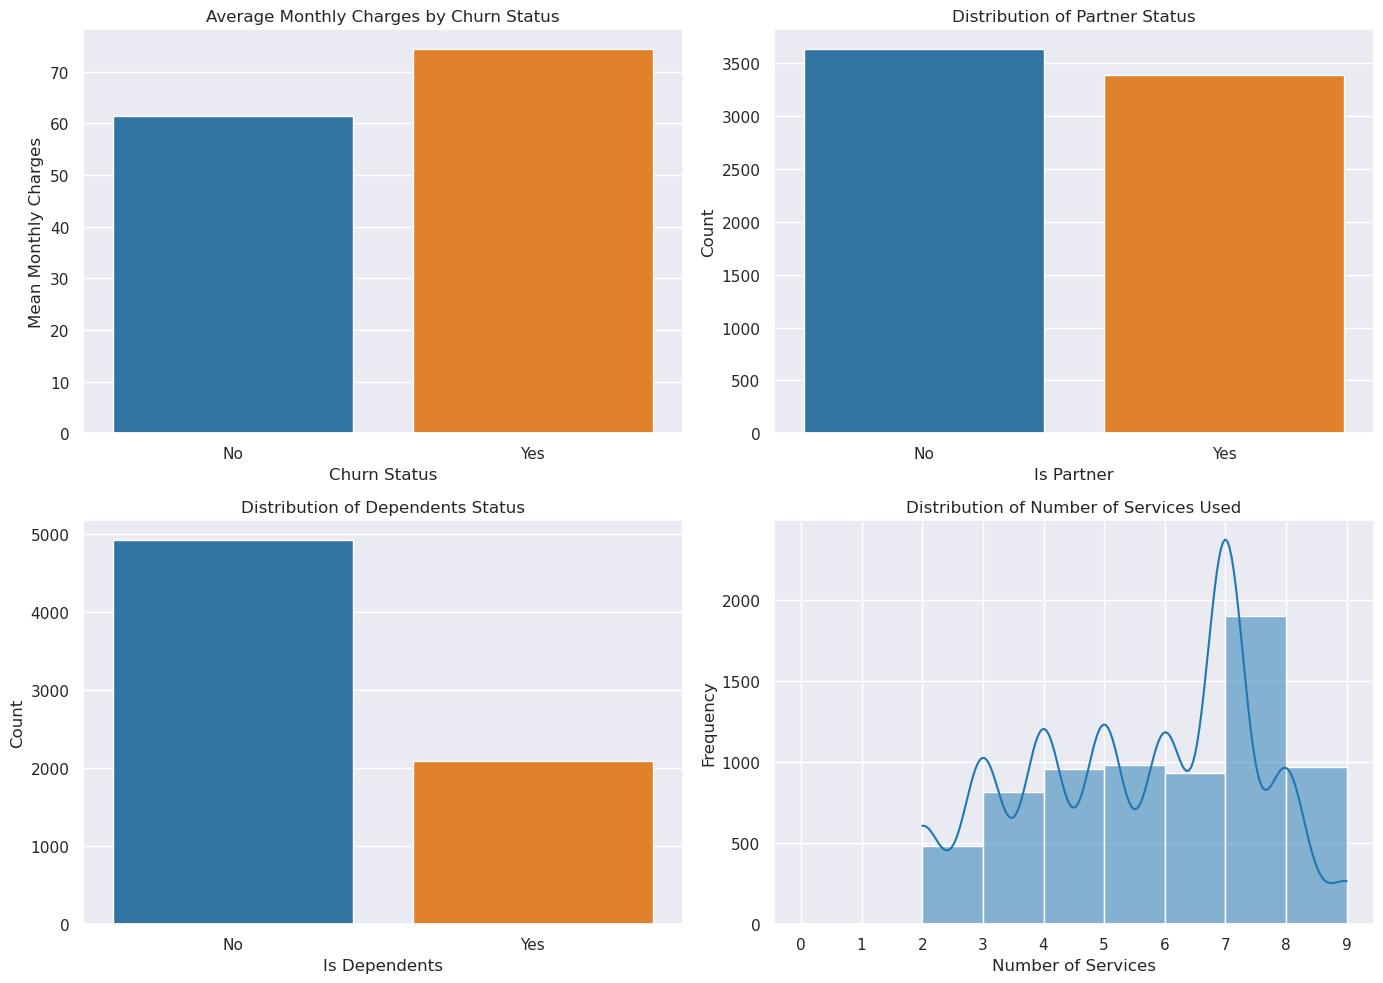

In [47]:
# Define custom colors
colors = ['#1f77b4', '#ff7f0e']

# Create a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. Average Monthly Charges by Churn Status
sns.barplot(data=monthly_charges_mean, x='Churn', y='mean_monthly_charges', palette=colors, ax=axs[0, 0])
axs[0, 0].set_title('Average Monthly Charges by Churn Status')
axs[0, 0].set_xlabel('Churn Status')
axs[0, 0].set_ylabel('Mean Monthly Charges')
axs[0, 0].set_xticklabels(['No', 'Yes'])

# 2. Distribution of Partner Status
sns.countplot(data=df, x='is_partner', ax=axs[0, 1], palette=colors)
axs[0, 1].set_title('Distribution of Partner Status')
axs[0, 1].set_xticklabels(['No', 'Yes'])
axs[0, 1].set_xlabel('Is Partner')
axs[0, 1].set_ylabel('Count')

# 3. Distribution of Dependents Status
sns.countplot(data=df, x='is_dependents', ax=axs[1, 0], palette=colors)
axs[1, 0].set_title('Distribution of Dependents Status')
axs[1, 0].set_xticklabels(['No', 'Yes'])
axs[1, 0].set_xlabel('Is Dependents')
axs[1, 0].set_ylabel('Count')

# 4. Distribution of Number of Services Used
sns.histplot(df['num_services'], bins=range(0, 10), kde=True, color=colors[0], ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Number of Services Used')
axs[1, 1].set_xlabel('Number of Services')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_xticks(range(0, 10))

# Adjust layout
plt.tight_layout()
plt.show()

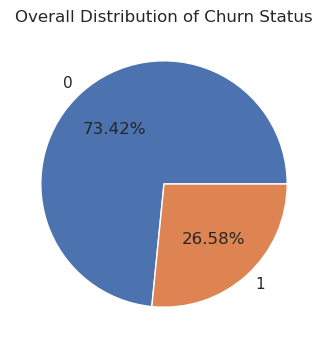

In [60]:
churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(6, 4))

# Values and labels for the chart
index_values = churn_counts
index_labels = churn_counts.index

# Create the pie chart
plt.pie(index_values, labels=index_labels, autopct='%2.2f%%')

# Title of the chart
plt.title('Overall Distribution of Churn Status')

# Show the chart
plt.show()

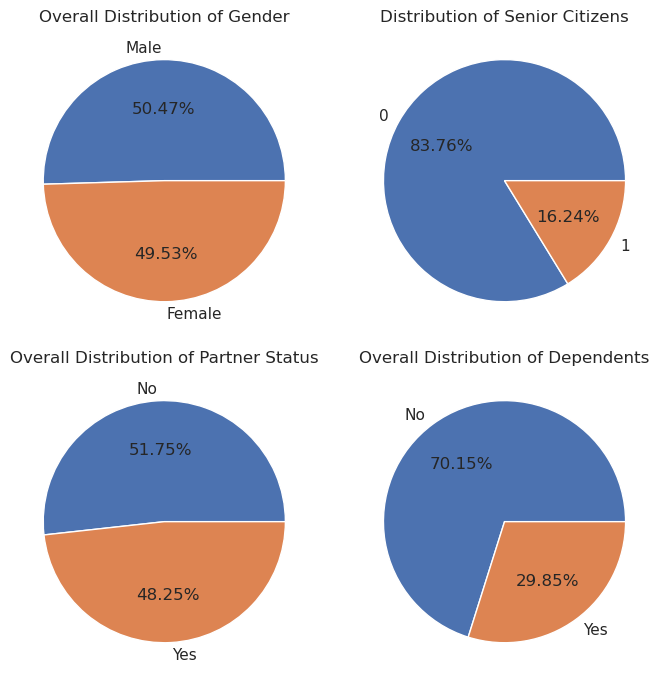

In [61]:
# Function to create pie charts
def plot_pie_chart(data, title, ax):
    ax.pie(data, labels=data.index, autopct='%2.2f%%')
    ax.set_title(title)

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

# 1. Gender Distribution
gender_counts = df['gender'].value_counts()
plot_pie_chart(gender_counts, 'Overall Distribution of Gender', axs[0, 0])

# 2. Senior Citizen Status
senior_counts = df['SeniorCitizen'].value_counts()
plot_pie_chart(senior_counts, 'Distribution of Senior Citizens', axs[0, 1])

# 3. Partner Status
partner_counts = df['Partner'].value_counts()
plot_pie_chart(partner_counts, 'Overall Distribution of Partner Status', axs[1, 0])

# 4. Dependents Status
dependents_counts = df['Dependents'].value_counts()
plot_pie_chart(dependents_counts, 'Overall Distribution of Dependents', axs[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()

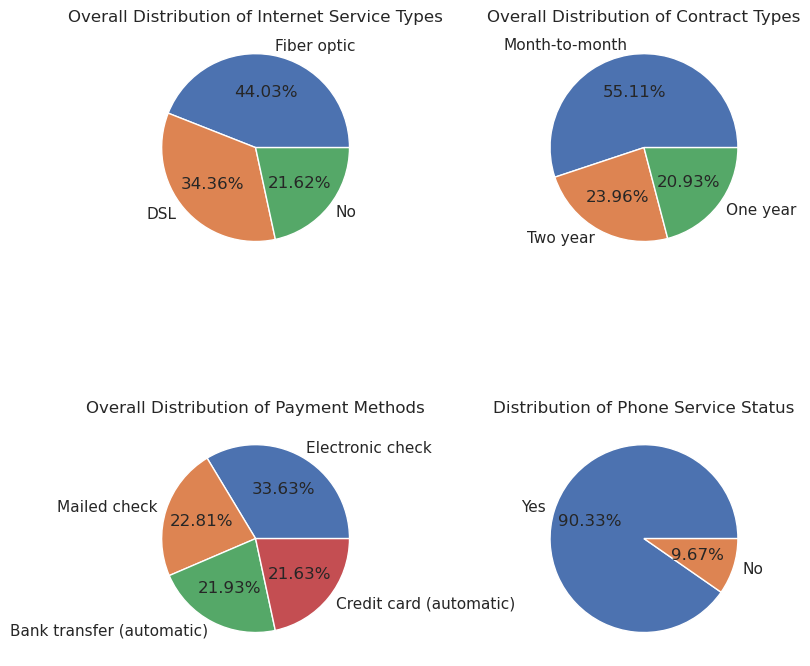

In [57]:
# Create another figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# 5. Internet Service Type
internet_counts = df['InternetService'].value_counts()
plot_pie_chart(internet_counts, 'Overall Distribution of Internet Service Types', axs[0, 0])

# 6. Contract Type
contract_counts = df['Contract'].value_counts()
plot_pie_chart(contract_counts, 'Overall Distribution of Contract Types', axs[0, 1])

# 7. Payment Method
payment_counts = df['PaymentMethod'].value_counts()
plot_pie_chart(payment_counts, 'Overall Distribution of Payment Methods', axs[1, 0])

# 8. Phone Service Status
phone_counts = df['PhoneService'].value_counts()
plot_pie_chart(phone_counts, 'Distribution of Phone Service Status', axs[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()

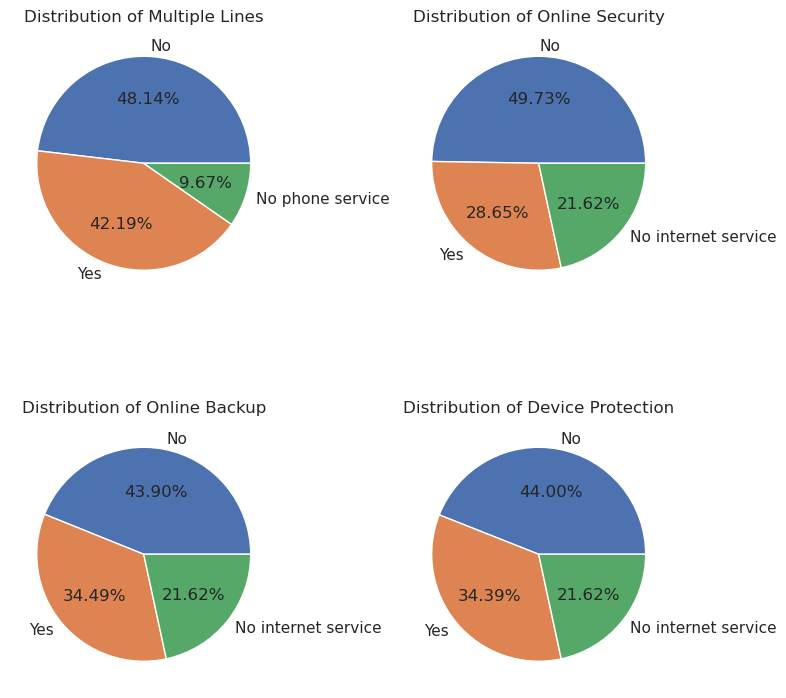

In [58]:
# Create a figure with subplots for the next group of variables
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# 9. Multiple Lines
multiple_lines_counts = df['MultipleLines'].value_counts()
plot_pie_chart(multiple_lines_counts, 'Distribution of Multiple Lines', axs[0, 0])

# 10. Online Security
online_security_counts = df['OnlineSecurity'].value_counts()
plot_pie_chart(online_security_counts, 'Distribution of Online Security', axs[0, 1])

# 11. Online Backup
online_backup_counts = df['OnlineBackup'].value_counts()
plot_pie_chart(online_backup_counts, 'Distribution of Online Backup', axs[1, 0])

# 12. Device Protection
device_protection_counts = df['DeviceProtection'].value_counts()
plot_pie_chart(device_protection_counts, 'Distribution of Device Protection', axs[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()

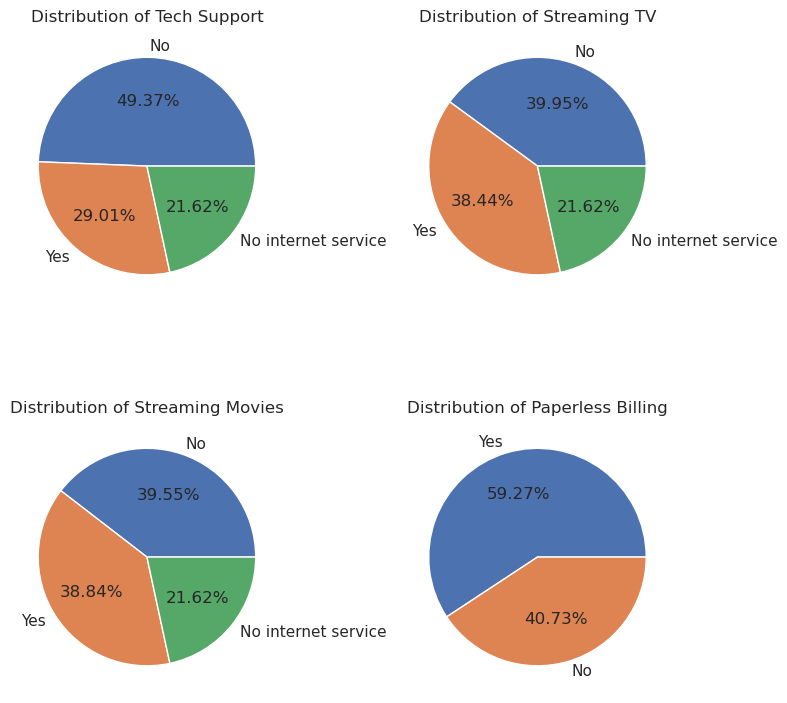

In [59]:
# Create another figure with subplots for the last group of variables
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# 13. Tech Support
tech_support_counts = df['TechSupport'].value_counts()
plot_pie_chart(tech_support_counts, 'Distribution of Tech Support', axs[0, 0])

# 14. Streaming TV
streaming_tv_counts = df['StreamingTV'].value_counts()
plot_pie_chart(streaming_tv_counts, 'Distribution of Streaming TV', axs[0, 1])

# 15. Streaming Movies
streaming_movies_counts = df['StreamingMovies'].value_counts()
plot_pie_chart(streaming_movies_counts, 'Distribution of Streaming Movies', axs[1, 0])

# 16. Paperless Billing
paperless_billing_counts = df['PaperlessBilling'].value_counts()
plot_pie_chart(paperless_billing_counts, 'Distribution of Paperless Billing', axs[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()

In [37]:
# 1. Basic statistics for numerical columns
numerical_stats = df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()
print("Descriptive Statistics for Numerical Columns:")
print(numerical_stats)

# Calculate median and standard deviation for additional details
median_values = df[['tenure', 'MonthlyCharges', 'TotalCharges']].median()
std_dev_values = df[['tenure', 'MonthlyCharges', 'TotalCharges']].std()

# Create a DataFrame for median and standard deviation
summary_stats = pd.DataFrame({
    'Median': median_values,
    'Standard Deviation': std_dev_values
})

print("\nSummary Statistics:")
display(summary_stats)  # Display summary statistics as a table

# 2. Distribution of categorical variables
categorical_vars = ['gender', 'Partner', 'Dependents', 'Churn']

print("\nDistribution of Categorical Variables:")
for var in categorical_vars:
    print(f"\nDistribution of {var}:")
    distribution = df[var].value_counts(normalize=True) * 100
    distribution_df = distribution.reset_index()
    distribution_df.columns = [var, 'Percentage']
    display(distribution_df)  # Display distribution as a table

Descriptive Statistics for Numerical Columns:
            tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

Summary Statistics:


,Median,Standard Deviation
tenure,29.000,24.545260
MonthlyCharges,70.350,30.085974
TotalCharges,1397.475,2266.771362



Distribution of Categorical Variables:

Distribution of gender:


,gender,Percentage
0,Male,50.469283
1,Female,49.530717



Distribution of Partner:


,Partner,Percentage
0,No,51.749147
1,Yes,48.250853



Distribution of Dependents:


,Dependents,Percentage
0,No,70.150739
1,Yes,29.849261



Distribution of Churn:


,Churn,Percentage
0,0,73.421502
1,1,26.578498


Series([], dtype: int64)


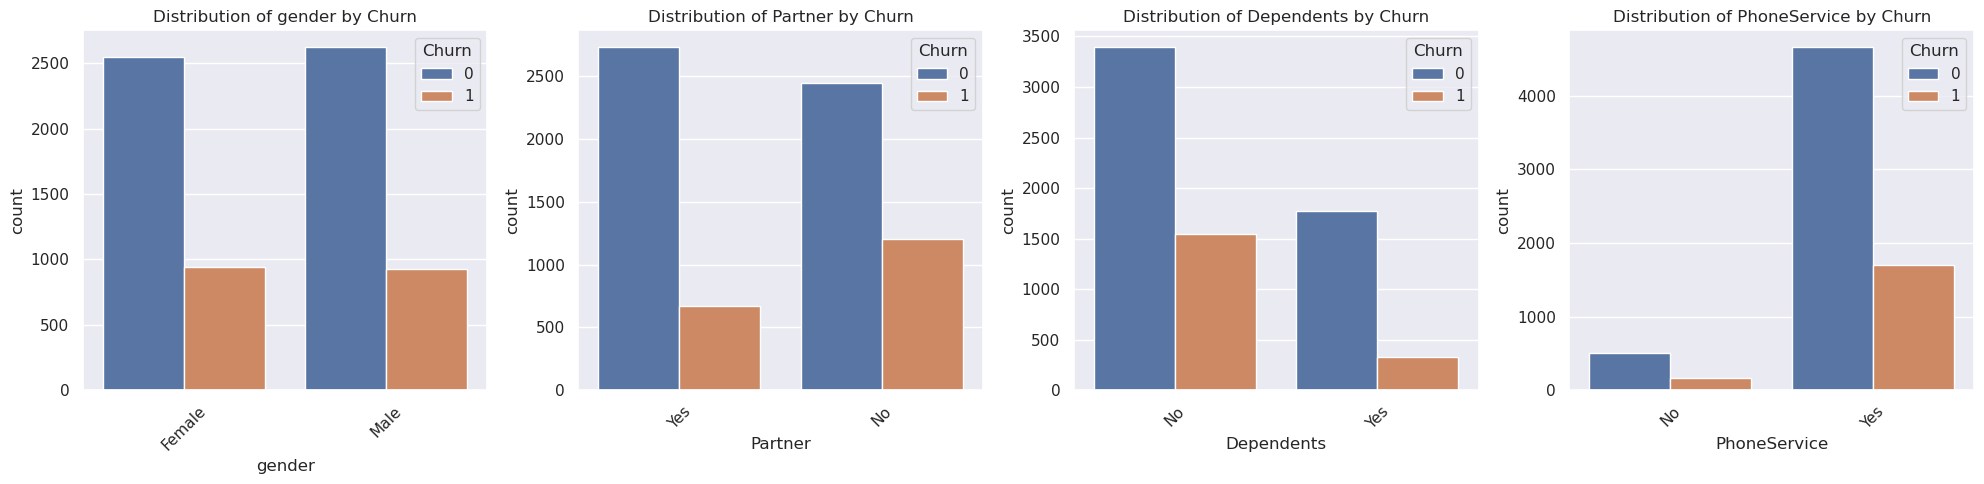

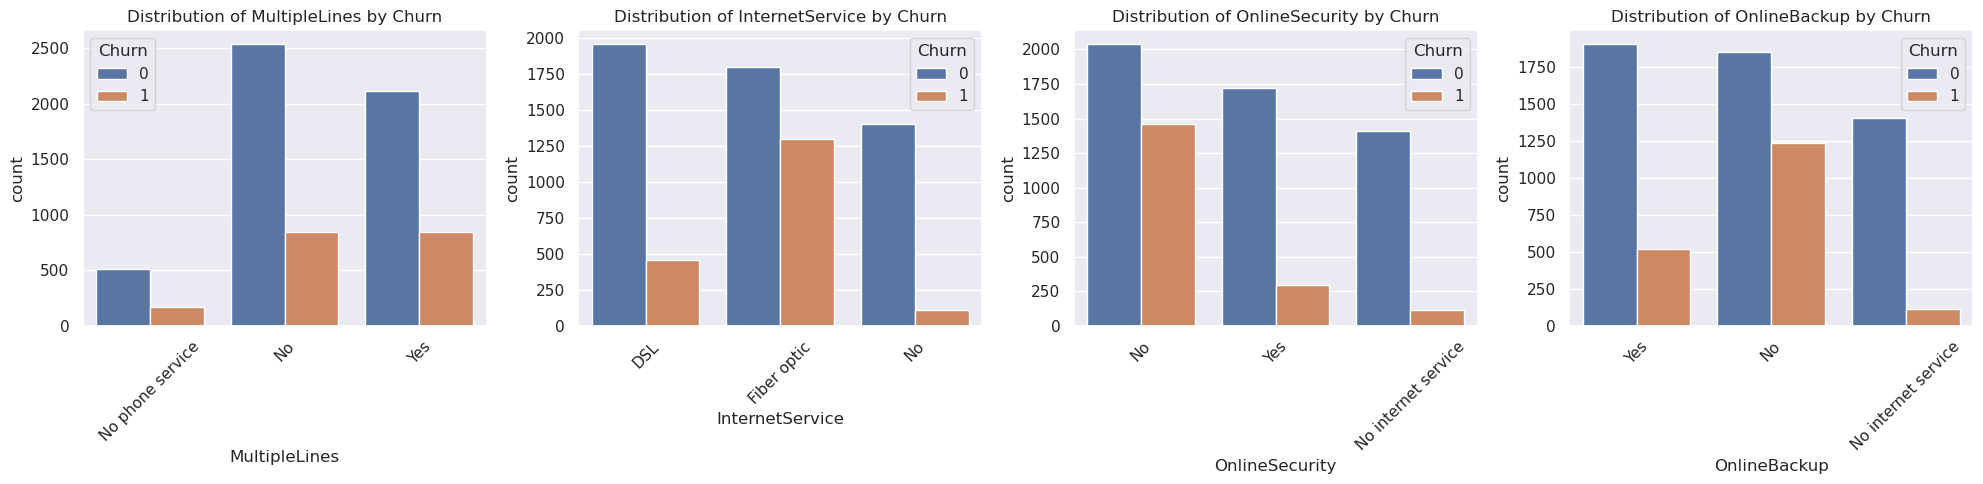

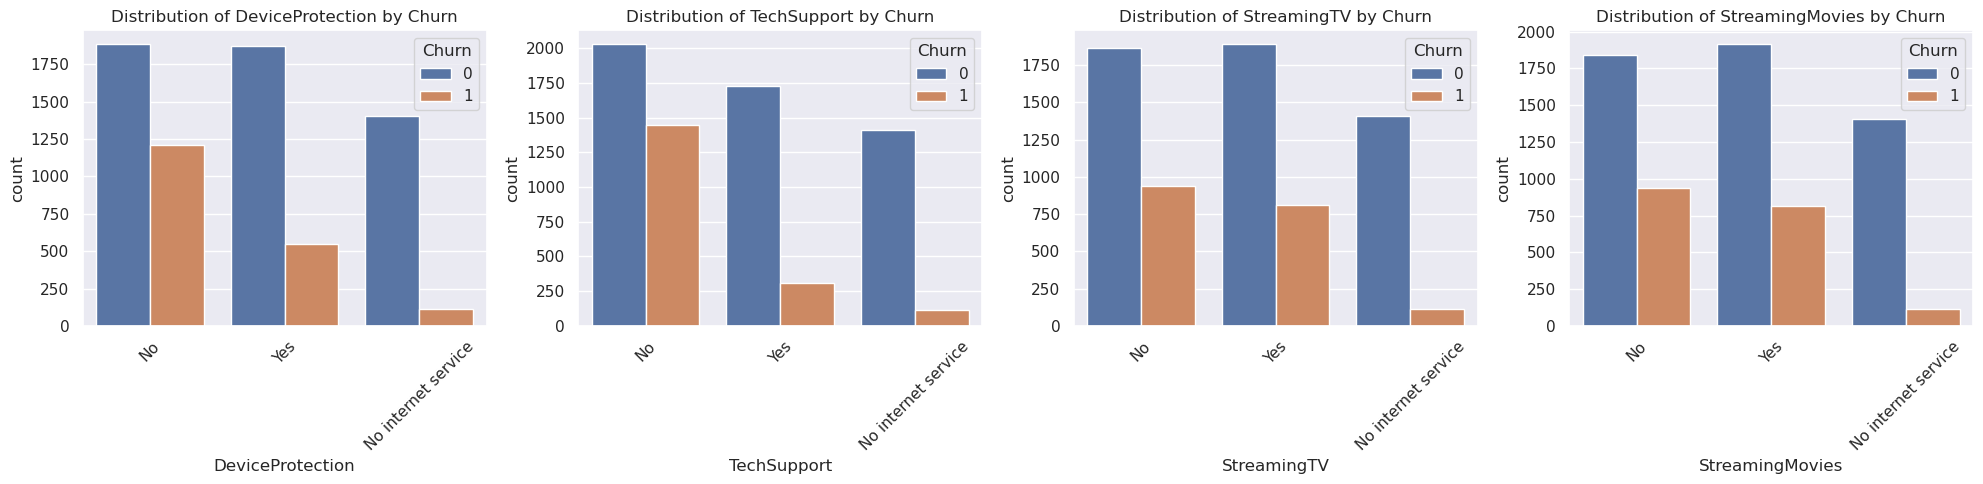

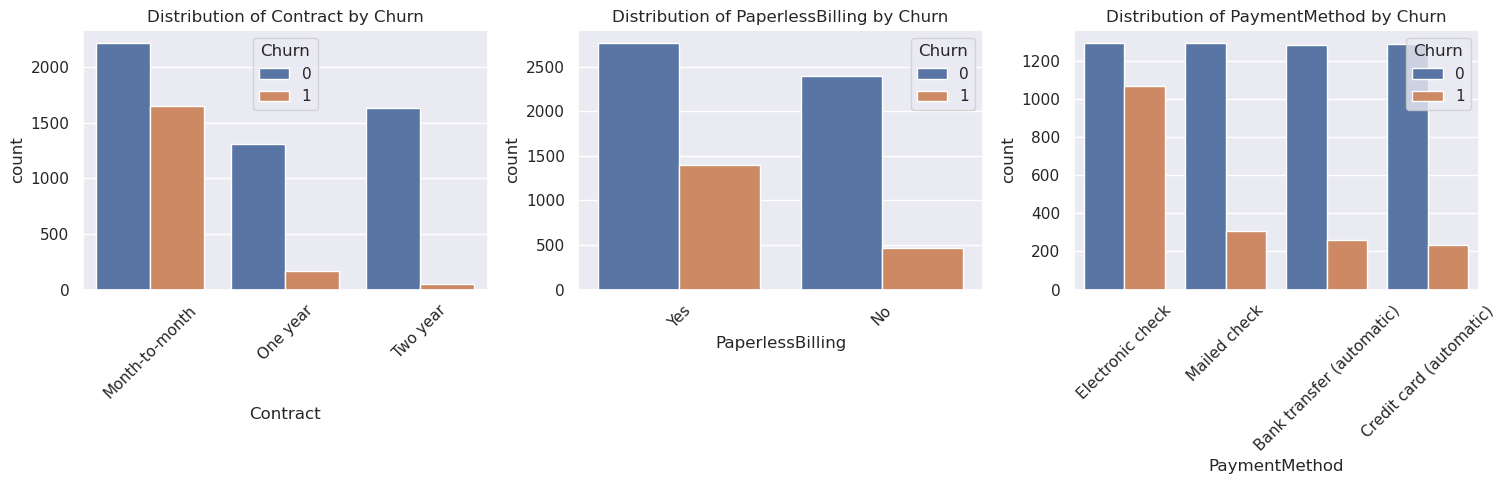

In [185]:
# Afficher le nombre de valeurs manquantes par colonne
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Liste des colonnes catégorielles
categorical_cols = df.select_dtypes(include=['object']).columns

# Nombre de colonnes pour la grille de sous-figures
n_cols = 4  

# Créer des plots en groupes de 4
for i in range(0, len(categorical_cols), n_cols):
    plt.figure(figsize=(20, 5))  # Créer une nouvelle figure pour chaque groupe de 4
    for j in range(n_cols):
        if i + j < len(categorical_cols):  # Vérifier si l'indice est dans les limites
            col = categorical_cols[i + j]
            plt.subplot(1, n_cols, j + 1)  # 1 ligne, n_cols colonnes
            sns.countplot(data=df, x=col, hue='Churn')
            plt.title(f'Distribution of {col} by Churn')
            plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

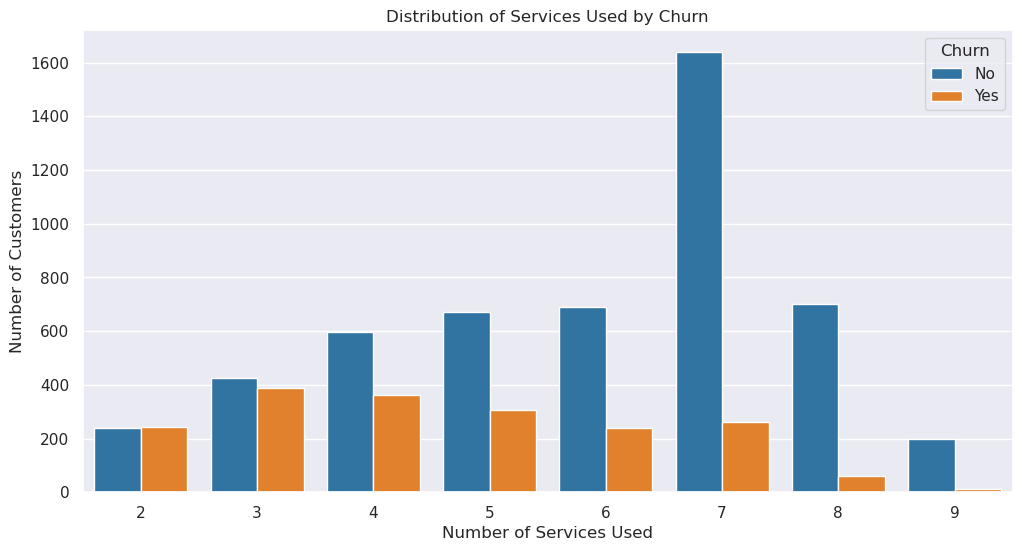

In [24]:
# 7. Visualization

colors = ['#1f77b4', '#ff7f0e'] 

# Create the plot
plt.figure(figsize=(12, 6))
sns.countplot(x='num_services', hue='Churn', data=df, palette=colors)
plt.title('Distribution of Services Used by Churn')
plt.xlabel('Number of Services Used')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.show()

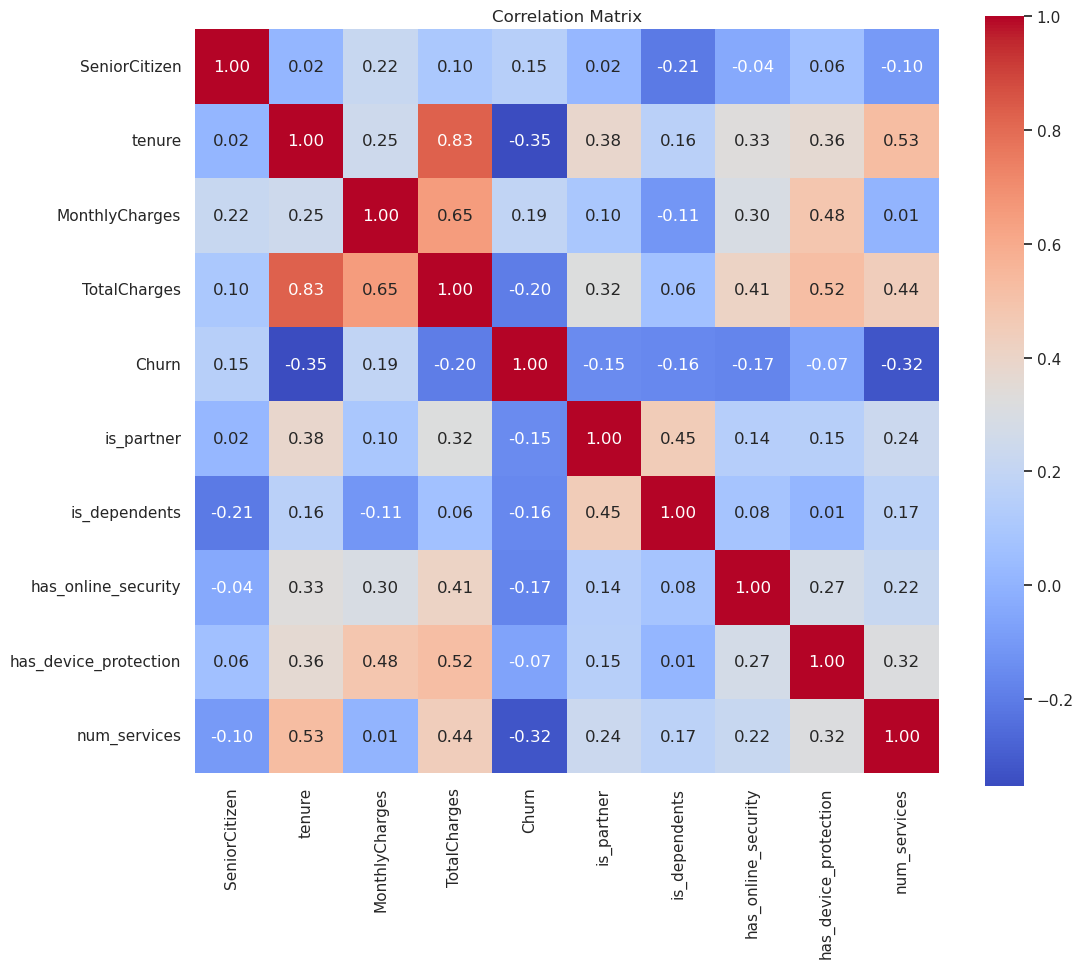

In [17]:
# 8. Correlation Analysis
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

In [6]:
# 6. One-Hot Encoding
df1 = pd.get_dummies(df)  # Converts categorical variables into dummy/indicator variables

# Creates a new DataFrame df1 with binary columns for each category in the original DataFrame.

# 7. Correlation Analysis
corre = df1.corr()  # Computes the correlation matrix

print(corre)


                                         SeniorCitizen    tenure  \
SeniorCitizen                                 1.000000  0.015683   
tenure                                        0.015683  1.000000   
MonthlyCharges                                0.219874  0.246862   
TotalCharges                                  0.102411  0.825880   
Churn                                         0.150541 -0.354049   
gender_Female                                 0.001819 -0.005285   
gender_Male                                  -0.001819  0.005285   
Partner_No                                   -0.016957 -0.381912   
Partner_Yes                                   0.016957  0.381912   
Dependents_No                                 0.210550 -0.163386   
Dependents_Yes                               -0.210550  0.163386   
PhoneService_No                              -0.008392 -0.007877   
PhoneService_Yes                              0.008392  0.007877   
MultipleLines_No                             -0.

In [49]:
# 1. Data Preparation

# Target Variable (y): The code extracts the target variable (what we want to predict), which is Churn from the DataFrame df1.
y = df1.Churn.values

# Corrected line: specify axis using a keyword
X = df1.drop('Churn', axis=1)


scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))

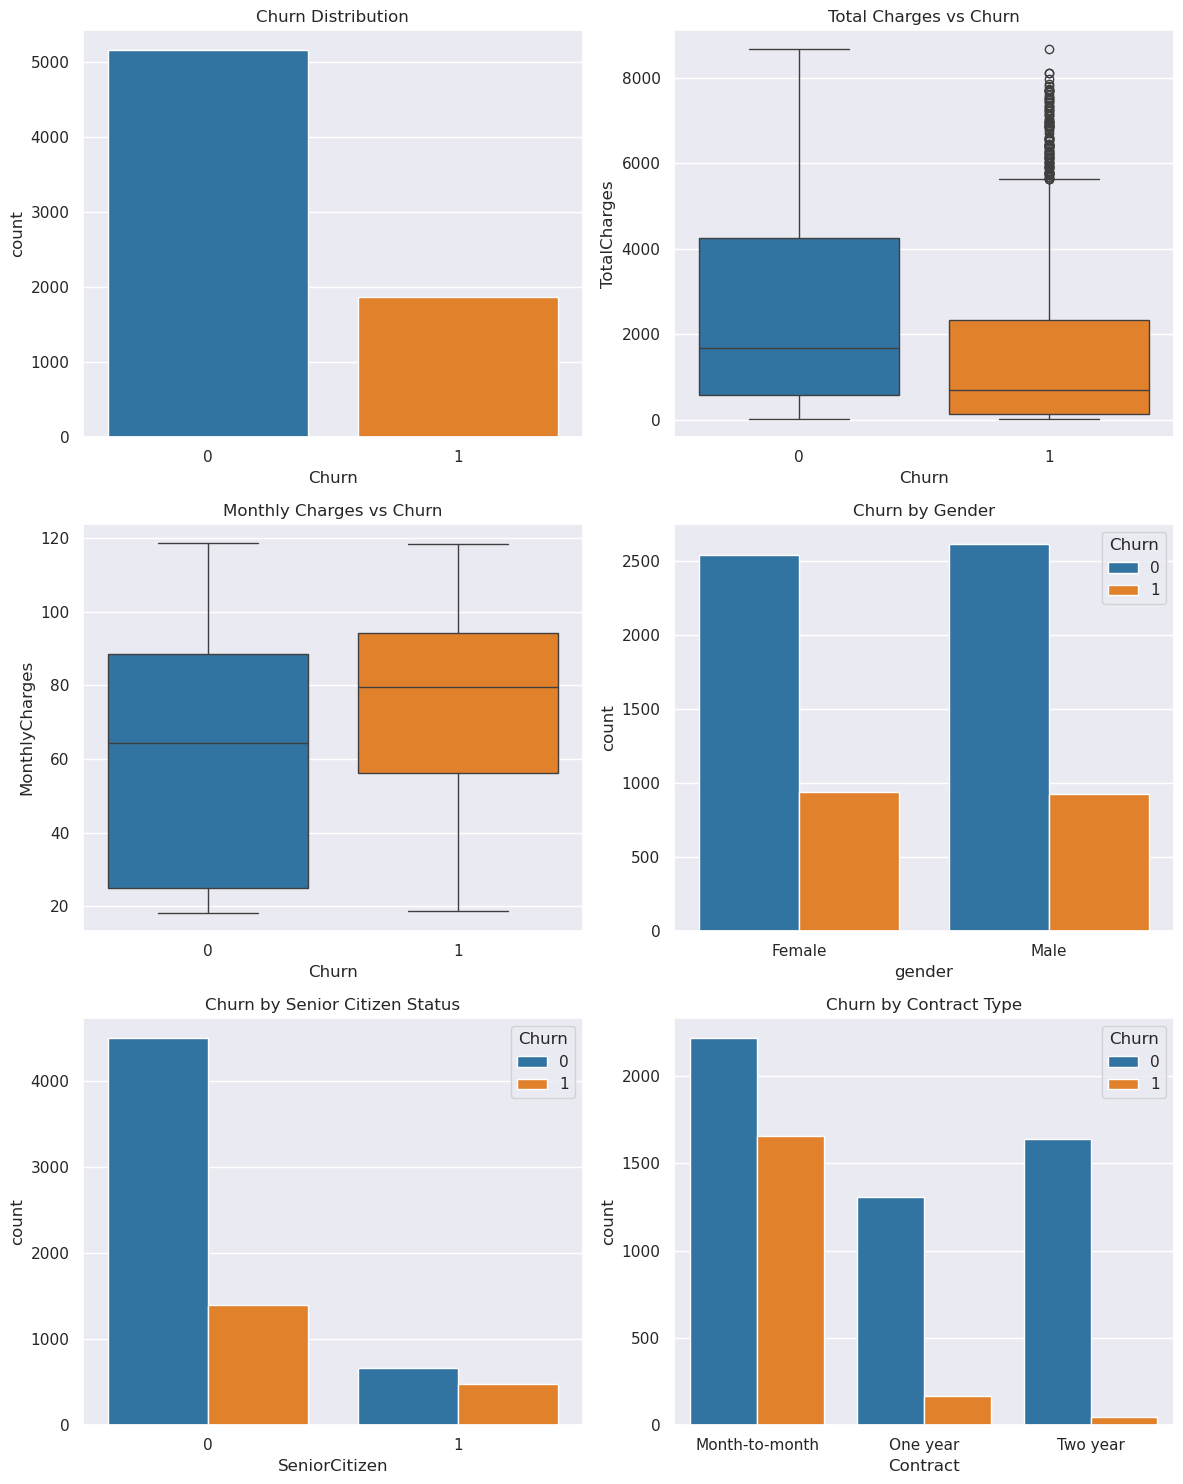

In [50]:


# Define color palette
colors = ["#1f77b4", "#ff7f0e"]

# Create a figure with subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 15))

# Churn distribution
sns.countplot(x="Churn", data=df, palette=colors, ax=axs[0, 0])
axs[0, 0].set_title("Churn Distribution")

# Total Charges vs Churn
sns.boxplot(x="Churn", y="TotalCharges", data=df, palette=colors, ax=axs[0, 1])
axs[0, 1].set_title("Total Charges vs Churn")

# Monthly Charges vs Churn
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette=colors, ax=axs[1, 0])
axs[1, 0].set_title("Monthly Charges vs Churn")

# Gender vs Churn
sns.countplot(x="gender", hue="Churn", data=df, palette=colors, ax=axs[1, 1])
axs[1, 1].set_title("Churn by Gender")

# Senior Citizen vs Churn
sns.countplot(x="SeniorCitizen", hue="Churn", data=df, palette=colors, ax=axs[2, 0])
axs[2, 0].set_title("Churn by Senior Citizen Status")

# Contract vs Churn
sns.countplot(x="Contract", hue="Churn", data=df, palette=colors, ax=axs[2, 1])
axs[2, 1].set_title("Churn by Contract Type")

# Adjust layout
plt.tight_layout()
plt.show()

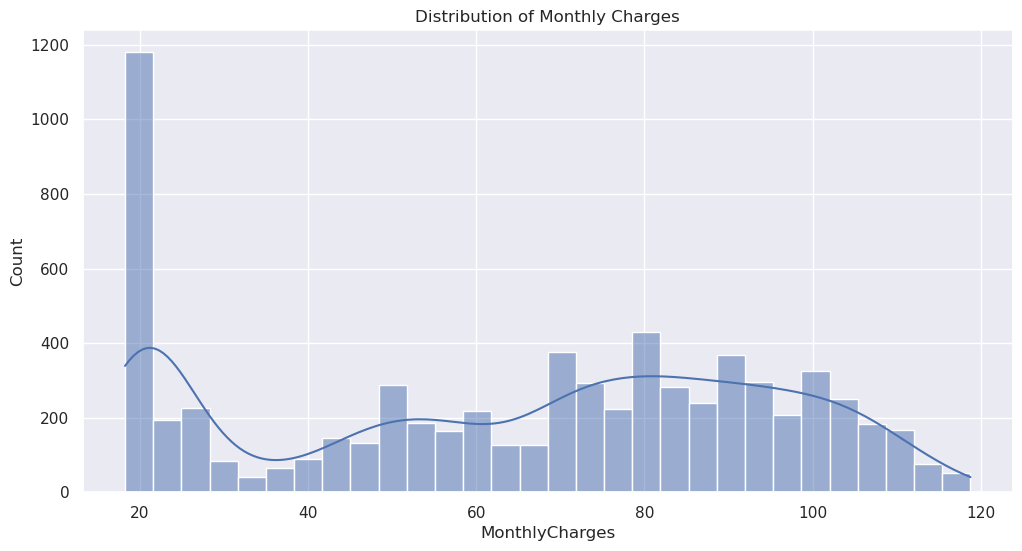

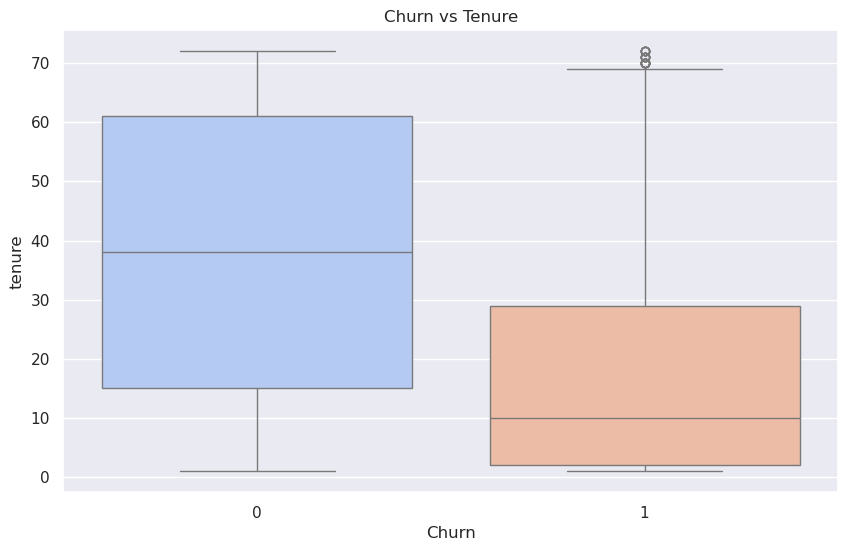

In [173]:
# --- 1. Univariate Analysis ---
plt.figure(figsize=(12,6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title("Distribution of Monthly Charges")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='tenure', data=df, palette='coolwarm')
plt.title("Churn vs Tenure")
plt.show()

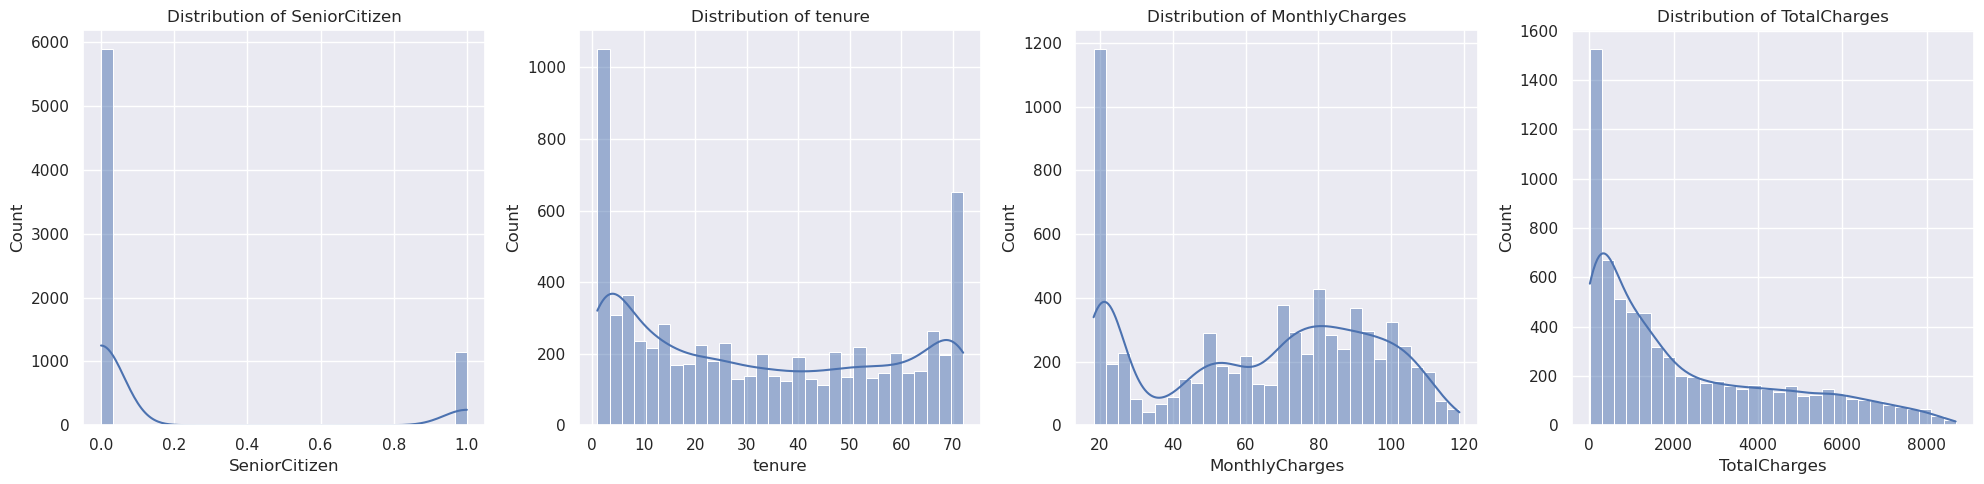

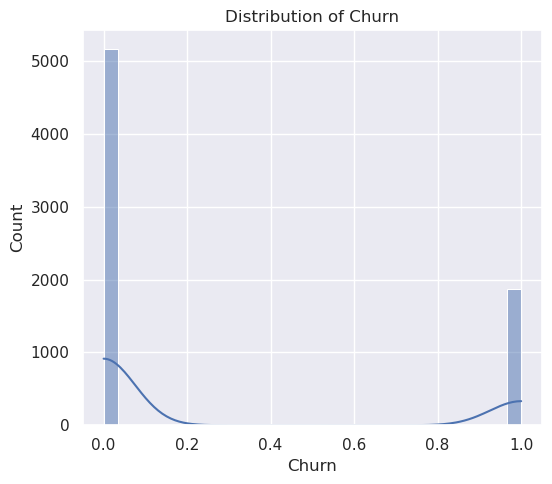

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des colonnes numériques
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Nombre de colonnes pour la grille de sous-figures
n_cols = 4  

# Créer des histogrammes par groupes de 4
for i in range(0, len(numerical_cols), n_cols):
    plt.figure(figsize=(20, 5))  # Créer une nouvelle figure pour chaque groupe de 4
    for j in range(n_cols):
        if i + j < len(numerical_cols):  # Vérifier si l'indice est dans les limites
            col = numerical_cols[i + j]
            plt.subplot(1, n_cols, j + 1)  # 1 ligne, n_cols colonnes
            sns.histplot(df[col], bins=30, kde=True)
            plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

In [10]:
# 2. Splitting the Data

# Train and Test Sets: The dataset is split into training and testing sets. The first 3993 rows are used for training, and the rest are for testing.
    
X_train = X.iloc[:3993, :]
X_test = X.iloc[3993:, :]
y_train = df1.iloc[:3993, :]['Churn']
y_test = df1.iloc[3993:, :]['Churn']

In [11]:

def stratified_cv(X, y, clf_class, shuffle=True, **kwargs):
    # Initialize the stratified K-Fold cross-validator
    stratified_k_fold = StratifiedKFold(shuffle=shuffle).split(X, y)
    
    # Create an array to hold predictions
    y_pred = pd.Series(index=range(len(y)), dtype=y.dtype)  # or use np.empty_like(y)
    
    for train_index, test_index in stratified_k_fold:
        # Split the data into training and testing sets
        Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
        ytrain = y[train_index]  # Use numpy indexing for y
        
        # Initialize the classifier
        clf = clf_class(**kwargs)
        
        # Fit the model
        clf.fit(Xtrain, ytrain)
        
        # Store predictions
        y_pred.iloc[test_index] = clf.predict(Xtest)
    
    return y_pred

In [12]:

#2. Evaluating Models

#The code evaluates the performance of various machine learning classifiers using accuracy as the metric. Here’s a breakdown of each line:

#Gradient Boosting Classifier: It uses the stratified_cv function to get predictions and then calculates the accuracy score.
    #python

print('Gradient Boosting Classifier:  {:.2f}'.format(
    metrics.accuracy_score(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))

#Support Vector Machine (SVM): Similar to the previous model, but it uses the SVM classifier.
#python

print('Support vector machine(SVM):   {:.2f}'.format(
    metrics.accuracy_score(y, stratified_cv(X, y, svm.SVC))))

#Random Forest Classifier: It evaluates the Random Forest model.
#python

print('Random Forest Classifier:      {:.2f}'.format(
    metrics.accuracy_score(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))

#K Nearest Neighbor Classifier: This evaluates the KNN model.
#python

print('K Nearest Neighbor Classifier: {:.2f}'.format(
    metrics.accuracy_score(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))

#Logistic Regression: It evaluates the Logistic Regression model.
#python

print('Logistic Regression:           {:.2f}'.format(
    metrics.accuracy_score(y, stratified_cv(X, y, linear_model.LogisticRegression))))

#XGBoost Classifier: Finally, it evaluates the XGBoost model.
#python

print('XGBoost Classifier:           {:.2f}'.format(
        metrics.accuracy_score(y, stratified_cv(X, y, XGBClassifier))))


Gradient Boosting Classifier:  0.80
Support vector machine(SVM):   0.80
Random Forest Classifier:      0.79
K Nearest Neighbor Classifier: 0.76
Logistic Regression:           0.80
XGBoost Classifier:           0.78


In [155]:


# List of models to evaluate
models = [
    ('Gradient Boosting Classifier', ensemble.GradientBoostingClassifier),
    ('Support Vector Machine (SVM)', svm.SVC),
    ('Random Forest Classifier', ensemble.RandomForestClassifier),
    ('K Nearest Neighbor Classifier', neighbors.KNeighborsClassifier),
    ('Logistic Regression', linear_model.LogisticRegression),
    ('XGBoost Classifier', XGBClassifier)
]

In [45]:
# Evaluate each model
for name, model_class in models:
    accuracy = metrics.accuracy_score(y, stratified_cv(X, y, model_class))
    print(f'{name}: {accuracy:.2f}')
    


print('Gradient Boosting Classifier:\n {}\n'.format(
    metrics.classification_report(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))



print('Support vector machine(SVM):\n {}\n'.format(
    metrics.classification_report(y, stratified_cv(X, y, svm.SVC))))



print('Random Forest Classifier:\n {}\n'.format(
    metrics.classification_report(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))



print('K Nearest Neighbor Classifier:\n {}\n'.format(
    metrics.classification_report(y, stratified_cv(X, y, neighbors.KNeighborsClassifier, n_neighbors=11))))



print('Logistic Regression:\n {}\n'.format(
    metrics.classification_report(y, stratified_cv(X, y, linear_model.LogisticRegression))))



print('XGBoost Classifier:\n {}\n'.format(
        metrics.classification_report(y, stratified_cv(X, y, XGBClassifier))))

Gradient Boosting Classifier: 0.80
Support Vector Machine (SVM): 0.80
Random Forest Classifier: 0.79
K Nearest Neighbor Classifier: 0.76
Logistic Regression: 0.80
XGBoost Classifier: 0.78
Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      5163
           1       0.67      0.52      0.59      1869

    accuracy                           0.81      7032
   macro avg       0.76      0.71      0.73      7032
weighted avg       0.80      0.81      0.80      7032


Support vector machine(SVM):
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      5163
           1       0.65      0.49      0.56      1869

    accuracy                           0.79      7032
   macro avg       0.74      0.70      0.71      7032
weighted avg       0.78      0.79      0.78      7032


Random Forest Classifier:
               precision    recall  f1-score   support

           0 

In [156]:


# Hyperparameter Tuning for Random Forest
# Create param grid.
param_rf = [{
    'n_estimators': list(range(10, 150, 15)),
    'max_features': list(range(6, 32, 5))
}]

# Create grid search object
clf_rf = RandomizedSearchCV(RandomForestClassifier(), 
                            param_distributions=param_rf, 
                            n_iter=50, 
                            cv=5, 
                            refit=True, 
                            verbose=1, 
                            n_jobs=-1)

# Fit on data
best_clf_rf = clf_rf.fit(X, y)

print("Best Random Forest Parameters:", best_clf_rf.best_params_)
print("Best Random Forest Score:", best_clf_rf.best_score_)

# Hyperparameter Tuning for Logistic Regression
# Create param grid for Logistic Regression
param_grid = [
    {
        'penalty': ['l1', 'l2'],
        'C': np.logspace(-5, 5, 20),
        'solver': ['liblinear']
    }
]

# Create grid search object for Logistic Regression
clf_lr = RandomizedSearchCV(LogisticRegression(), 
                            param_distributions=param_grid, 
                            n_iter=20, 
                            cv=5, 
                            refit=True, 
                            verbose=1, 
                            n_jobs=-1)

# Fit on data
best_clf_lr = clf_lr.fit(X, y)

print("Best Logistic Regression Parameters:", best_clf_lr.best_params_)
print("Best Logistic Regression Score:", best_clf_lr.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


Best Random Forest Parameters: {'n_estimators': 70, 'max_features': 16}
Best Random Forest Score: 0.789247321611815
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Logistic Regression Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 784.7599703514607}
Best Logistic Regression Score: 0.8046064131688639


In [160]:

# Hyperparameter Tuning for Gradient Boosting Classifier
param_gb = {
    'n_estimators': list(range(50, 300, 50)),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': list(range(3, 10, 2))
}

clf_gb = RandomizedSearchCV(GradientBoostingClassifier(), 
                            param_distributions=param_gb, 
                            n_iter=30, 
                            cv=5, 
                            refit=True, 
                            verbose=1, 
                            n_jobs=-1)

best_clf_gb = clf_gb.fit(X, y)
print("Best Gradient Boosting Parameters:", best_clf_gb.best_params_)
print("Best Gradient Boosting Score:", best_clf_gb.best_score_)

# Hyperparameter Tuning for Support Vector Machine (SVM)
param_svm = {
    'C': np.logspace(-3, 3, 10),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

clf_svm = RandomizedSearchCV(SVC(), 
                             param_distributions=param_svm, 
                             n_iter=20, 
                             cv=5, 
                             refit=True, 
                             verbose=1, 
                             n_jobs=-1)

best_clf_svm = clf_svm.fit(X, y)
print("Best SVM Parameters:", best_clf_svm.best_params_)
print("Best SVM Score:", best_clf_svm.best_score_)

# Hyperparameter Tuning for K-Nearest Neighbors (KNN)
param_knn = {
    'n_neighbors': list(range(1, 50, 2)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

clf_knn = RandomizedSearchCV(KNeighborsClassifier(), 
                             param_distributions=param_knn, 
                             n_iter=20, 
                             cv=5, 
                             refit=True, 
                             verbose=1, 
                             n_jobs=-1)

best_clf_knn = clf_knn.fit(X, y)
print("Best KNN Parameters:", best_clf_knn.best_params_)
print("Best KNN Score:", best_clf_knn.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Gradient Boosting Parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.10666666666666666}
Best Gradient Boosting Score: 0.8038949734157903
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best SVM Parameters: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.46415888336127775}
Best SVM Score: 0.8001959315392151
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best KNN Parameters: {'weights': 'uniform', 'n_neighbors': 49, 'metric': 'manhattan'}
Best KNN Score: 0.7895312100339594


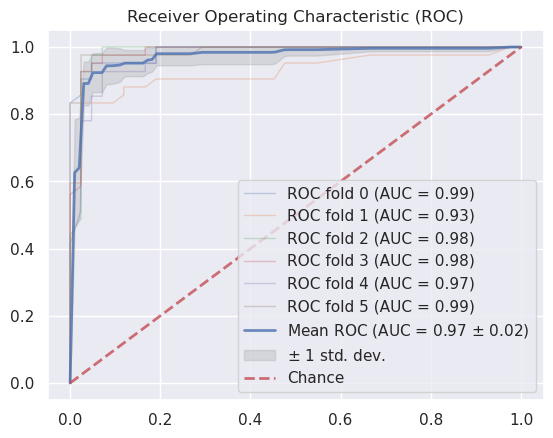

In [162]:


# Génération d'un jeu de données factice
X, y = make_classification(n_samples=500, n_features=20, random_state=42)

# Définition du modèle et de la validation croisée
cv = StratifiedKFold(n_splits=6)
classifier = RandomForestClassifier(n_estimators=113, random_state=42)

# Variables pour stocker les résultats
tprs, aucs = [], []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

# Boucle sur chaque fold
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    y_proba = classifier.predict_proba(X[test])[:, 1]  # Probabilités pour la classe positive
    fpr, tpr, _ = roc_curve(y[test], y_proba)
    auc_value = auc(fpr, tpr)
    
    # Interpolation des TPRs pour avoir des points alignés sur mean_fpr
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(auc_value)
    
    # Tracé ROC du fold
    ax.plot(fpr, tpr, alpha=0.3, lw=1, label=f'ROC fold {i} (AUC = {auc_value:.2f})')

# Tracé de la moyenne des TPRs et intervalle d'incertitude
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

ax.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=0.8)

# Intervalle d'incertitude
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2, label=r'$\pm$ 1 std. dev.')

# Tracé de la ligne aléatoire
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

# Configuration du graphique
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="Receiver Operating Characteristic (ROC)")
ax.legend(loc="lower right")
plt.show()


RF: f1=0.543 auc=0.605


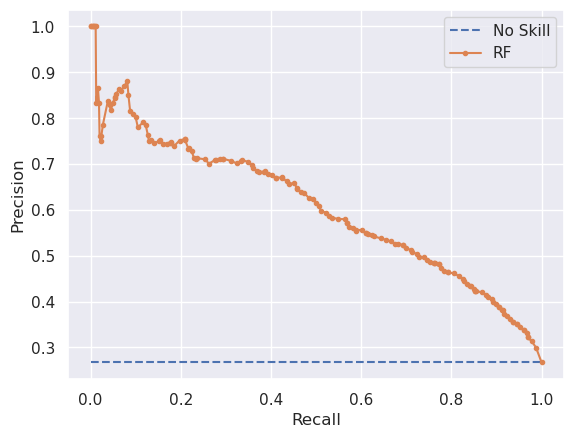

In [163]:
rfmodel = RandomForestClassifier(n_estimators=130, max_features=6, n_jobs=-1)
rfmodel.fit(X_train, y_train)
lg_probs = rfmodel.predict_proba(X_test)
lg_probs = lg_probs[:, 1]
yhat = rfmodel.predict(X_test)

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lg_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)

# Résumé des scores
print('RF: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# Tracer les courbes de précision-rappel
no_skill = len(y_test[y_test == 1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='RF')

# Labels des axes
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')

# Afficher la légende et le graphique
pyplot.legend()
pyplot.show()

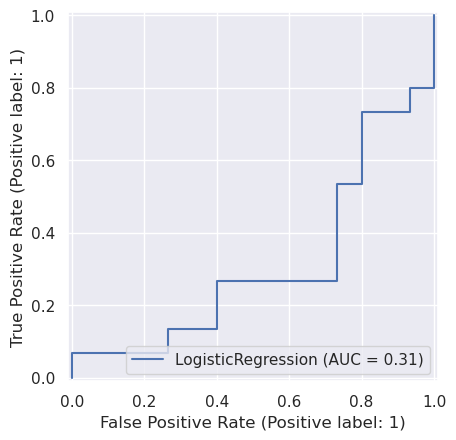

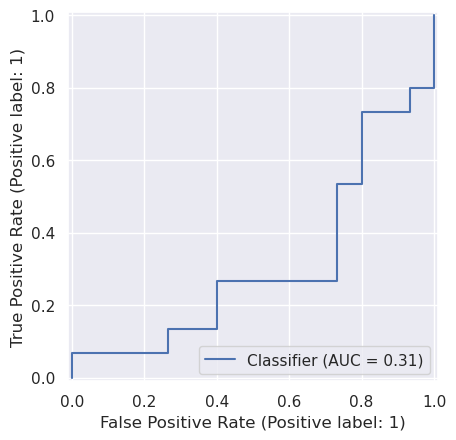

In [166]:
# 2. XGBoost performance

from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual data)
X, y = np.random.rand(100, 5), np.random.randint(0, 2, 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train a model (replace with your actual model)
model = LogisticRegression()
model.fit(X_train, y_train)

#from_estimator
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

#from_predictions
y_pred_proba = model.predict_proba(X_test)[:, 1]
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.show()


In [168]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

# Dictionary of model classes (not instances)
models = {
    "Logistic Regression": LogisticRegression,
    "Random Forest Classifier": RandomForestClassifier,
    "Gradient Boosting Classifier": GradientBoostingClassifier,
    "K Nearest Neighbor Classifier": KNeighborsClassifier,
    "Support Vector Machine (SVM)": SVC,
    "XGBoost Classifier": XGBClassifier
}

# Ensure X is a DataFrame
X = pd.DataFrame(X)

# Apply stratified_cv for each model and compute the confusion matrix
for model_name, ModelClass in models.items():
    y_pred = stratified_cv(X, y, ModelClass)  # Pass the class, not an instance
    conf_matrix = confusion_matrix(y, y_pred)

    # Convert to DataFrame with labeled rows and columns
    conf_mat_df = pd.DataFrame(
        conf_matrix, 
        columns=["Predicted NO", "Predicted YES"], 
        index=["Actual NO", "Actual YES"]
    )
    
    # Display as a percentage
    print(f"\n{model_name}:")
    print((conf_mat_df / 7032) * 100)



Logistic Regression:
            Predicted NO  Predicted YES
Actual NO       0.426621       0.312856
Actual YES      0.398180       0.284414

Random Forest Classifier:
            Predicted NO  Predicted YES
Actual NO       0.455063       0.284414
Actual YES      0.369738       0.312856

Gradient Boosting Classifier:
            Predicted NO  Predicted YES
Actual NO       0.412400       0.327076
Actual YES      0.327076       0.355518

K Nearest Neighbor Classifier:
            Predicted NO  Predicted YES
Actual NO       0.455063       0.284414
Actual YES      0.284414       0.398180

Support Vector Machine (SVM):
            Predicted NO  Predicted YES
Actual NO       0.554608       0.184869
Actual YES      0.312856       0.369738

XGBoost Classifier:
            Predicted NO  Predicted YES
Actual NO       0.327076        0.41240
Actual YES      0.284414        0.39818
